# Phase 1: The Detective Work (Setup & Inspection)


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
data_path = '../customer_analytics.csv'
df = pd.read_csv(data_path)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")  # Display dimensions

Dataset loaded successfully!
Dataset shape: (255, 14)


In [2]:
# Display the first few rows to understand the structure
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   CustomerID  Age  Gender    City  Education MaritalStatus  AnnualIncome  \
0        1001   49    Male    Pune    Masters        Single       82953.0   
1        1002   44    Male    Pune        PhD        Single       60610.0   
2        1003   42    Male  Mumbai  Bachelors        Single       35501.0   
3        1004   36  Female  Mumbai    Masters       Married       99312.0   
4        1005   23    Male    Pune    Masters       Married       46980.0   

   SpendingScore  YearsEmployed  PurchaseFrequency  OnlineVisitsPerMonth  \
0             66             23                 19                     9   
1             56             22                  1                    23   
2             44             18                 10                    29   
3             36             10                 12                    21   
4             56              1                 18                     9   

   ReturnedItems PreferredDevice  LastPurchaseAmoun

In [3]:
# Get information about data types and missing values
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    str    
 3   City                  255 non-null    str    
 4   Education             243 non-null    str    
 5   MaritalStatus         255 non-null    str    
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    str    
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), str(5)
memory usage: 28.0 KB
None


In [4]:
# Display basic statistics for numerical columns
print("\nBasic Statistics for Numerical Features:")
print(df.describe())


Basic Statistics for Numerical Features:
        CustomerID         Age   AnnualIncome  SpendingScore  YearsEmployed  \
count   255.000000  255.000000     243.000000     255.000000     255.000000   
mean   1126.941176   37.729412   74499.901235      45.721569      14.682353   
std      72.397256    9.767842   43939.855655      17.869522       9.651664   
min    1001.000000   21.000000   16062.000000       5.000000       1.000000   
25%    1064.500000   29.000000   56353.000000      34.500000       6.000000   
50%    1128.000000   38.000000   69629.000000      47.000000      15.000000   
75%    1190.500000   46.000000   84030.500000      57.500000      23.000000   
max    1250.000000   54.000000  474327.000000      95.000000      34.000000   

       PurchaseFrequency  OnlineVisitsPerMonth  ReturnedItems  \
count         255.000000            255.000000     255.000000   
mean           11.568627             16.078431       1.858824   
std             7.077899              7.909536     

# Phase 2: The Cleanup (Data Preprocessing)



In [5]:
# Check for missing values
print("Missing Values in Each Column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing_Count'] > 0])
print("\nTotal missing values in dataset:", df.isnull().sum().sum())

Missing Values in Each Column:
              Missing_Count  Percentage
Education                12    4.705882
AnnualIncome             12    4.705882

Total missing values in dataset: 24


## Data Cleaning Strategy



In [ ]:
# Apply imputation for missing values
# For AnnualIncome: use median imputation
if df['AnnualIncome'].isnull().sum() > 0:
    median_income = df['AnnualIncome'].median()
    df['AnnualIncome'].fillna(median_income, inplace=True)
    print(f"Imputed {df['AnnualIncome'].isnull().sum()} missing values in AnnualIncome with median: {median_income:.2f}")

# Verify no missing values remain
print(f"\nMissing values after imputation: {df.isnull().sum().sum()}")

Imputed 12 missing values in AnnualIncome with median: 69629.00

Missing values after imputation: 24


C:\Users\deepg\AppData\Local\Temp\ipykernel_24744\2809302026.py:5: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['AnnualIncome'].fillna(median_income, inplace=True)


In [7]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("\nRemoving duplicate rows...")
    df = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df.shape}")
else:
    print("No duplicates found in the dataset!")

Number of duplicate rows: 5

Removing duplicate rows...
Dataset shape after removing duplicates: (250, 14)


# Phase 3: The Deep Dive (Univariate & Bivariate Analysis)



## Univariate Analysis

### Plot 1: Distribution of Customer Age

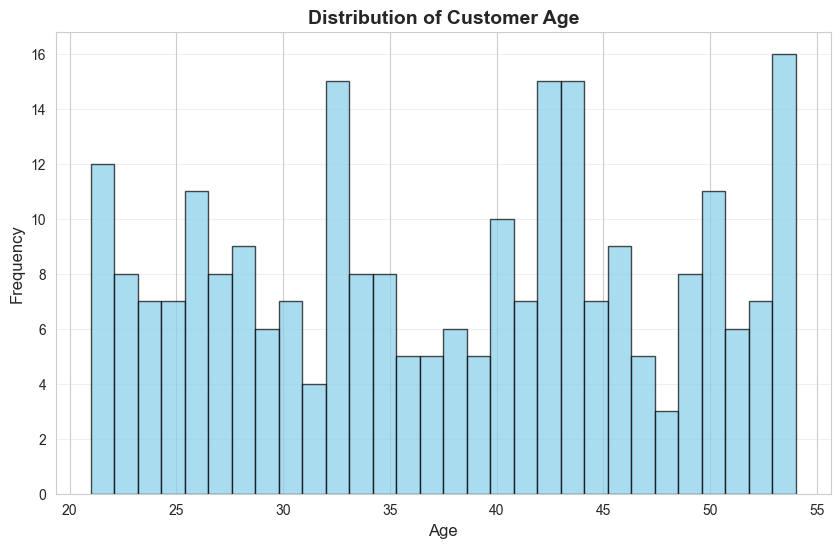

Age Statistics:
count    250.000000
mean      37.676000
std        9.816132
min       21.000000
25%       29.000000
50%       38.000000
75%       46.000000
max       54.000000
Name: Age, dtype: float64


In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Customer Age', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"Age Statistics:\n{df['Age'].describe()}")

### Plot 2: Customer Distribution by Gender

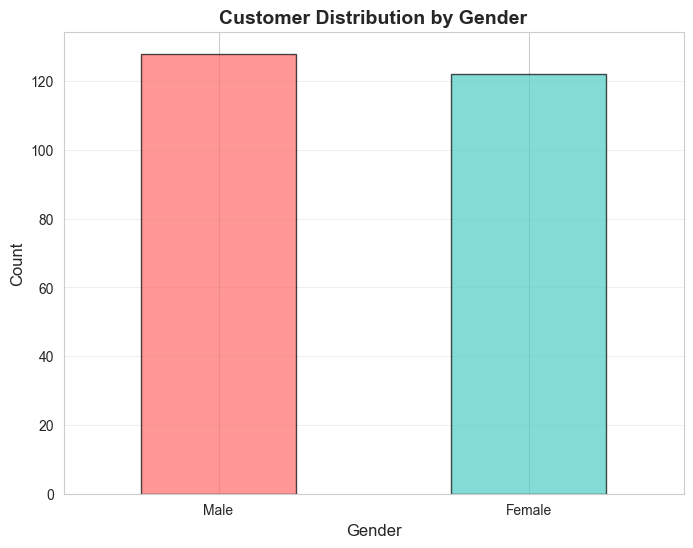

Gender Distribution:
Gender
Male      128
Female    122
Name: count, dtype: int64

Percentage Distribution:
Gender
Male      51.2
Female    48.8
Name: count, dtype: float64%


In [9]:
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']
gender_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.7)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Customer Distribution by Gender', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Gender Distribution:")
print(gender_counts)
print(f"\nPercentage Distribution:\n{(gender_counts/len(df)*100).round(2)}%")

### Plot 3: Distribution of Annual Income

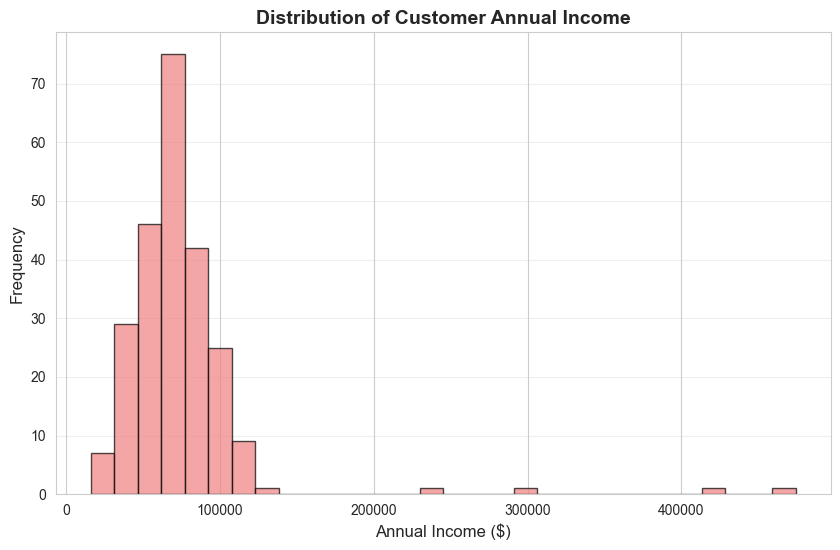

Annual Income Statistics:
count       238.000000
mean      74584.222689
std       44313.732255
min       16062.000000
25%       56222.000000
50%       69944.500000
75%       84096.250000
max      474327.000000
Name: AnnualIncome, dtype: float64


In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['AnnualIncome'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Customer Annual Income', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"Annual Income Statistics:\n{df['AnnualIncome'].describe()}")

## Bivariate Analysis

### Plot 4: Relationship between Age and Annual Income

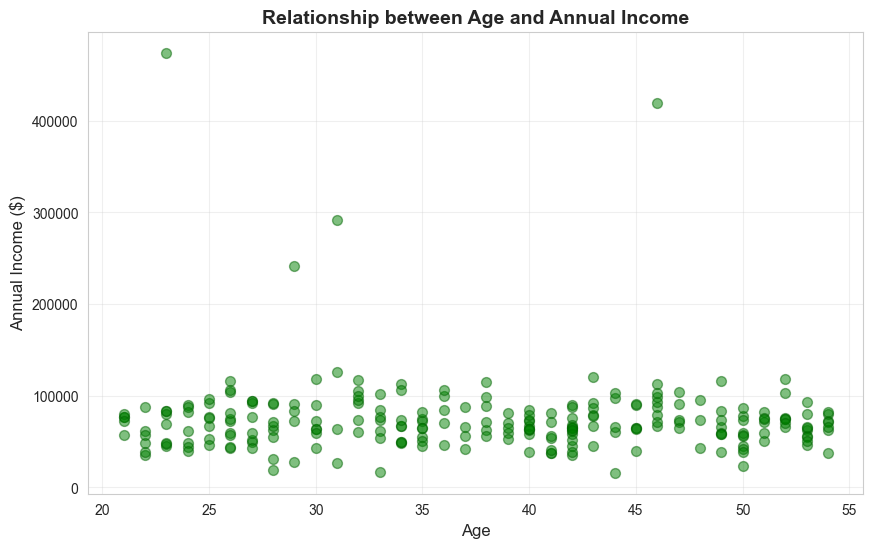

Correlation between Age and Annual Income: -0.0529


In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['AnnualIncome'], alpha=0.5, s=50, color='green', edgecolor='darkgreen')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Annual Income ($)', fontsize=12)
plt.title('Relationship between Age and Annual Income', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

# Calculate correlation
correlation = df['Age'].corr(df['AnnualIncome'])
print(f"Correlation between Age and Annual Income: {correlation:.4f}")

### Plot 5: Income Distribution by Gender (Boxplot)

C:\Users\deepg\AppData\Local\Temp\ipykernel_24744\2137512350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='AnnualIncome', palette='Set2')


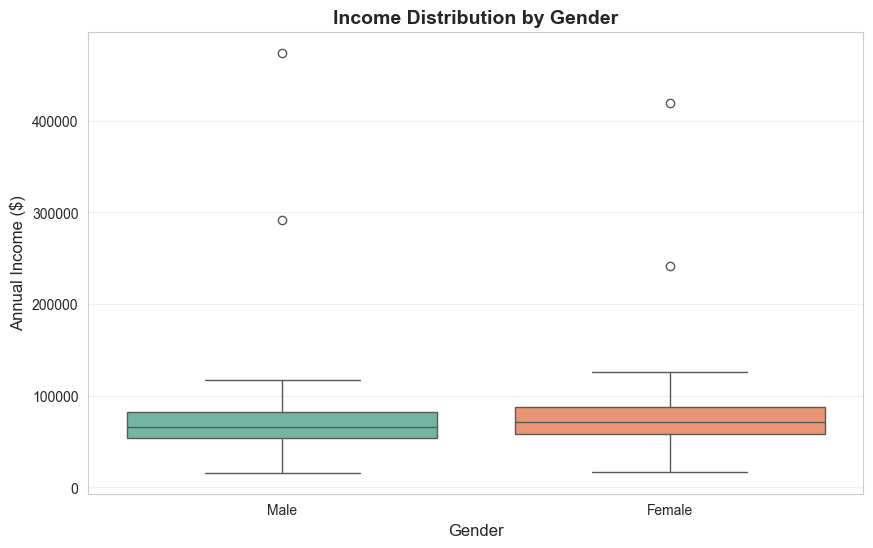

Income Statistics by Gender:
        count          mean           std      min      25%      50%      75%  \
Gender                                                                          
Female  115.0  76671.678261  42141.484496  17054.0  58780.5  71149.0  87756.5   
Male    123.0  72632.536585  46339.425195  16062.0  54140.5  66419.0  82706.0   

             max  
Gender            
Female  419963.0  
Male    474327.0  


In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='AnnualIncome', palette='Set2')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Annual Income ($)', fontsize=12)
plt.title('Income Distribution by Gender', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Statistical summary
print("Income Statistics by Gender:")
print(df.groupby('Gender')['AnnualIncome'].describe())

# Phase 4: The Big Picture (Multivariate & Storytelling)



## Multivariate Analysis: Correlation Matrix

In [13]:
# Calculate correlation matrix for numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

Correlation Matrix:
                      CustomerID    Age  AnnualIncome  SpendingScore  \
CustomerID                 1.000 -0.038        -0.041          0.071   
Age                       -0.038  1.000        -0.053         -0.007   
AnnualIncome              -0.041 -0.053         1.000         -0.400   
SpendingScore              0.071 -0.007        -0.400          1.000   
YearsEmployed             -0.019  0.975        -0.056         -0.017   
PurchaseFrequency         -0.077  0.103        -0.038          0.010   
OnlineVisitsPerMonth      -0.030 -0.034         0.096         -0.072   
ReturnedItems              0.023 -0.051        -0.117          0.058   
LastPurchaseAmount        -0.034  0.093        -0.016          0.033   

                      YearsEmployed  PurchaseFrequency  OnlineVisitsPerMonth  \
CustomerID                   -0.019             -0.077                -0.030   
Age                           0.975              0.103                -0.034   
AnnualIncome       

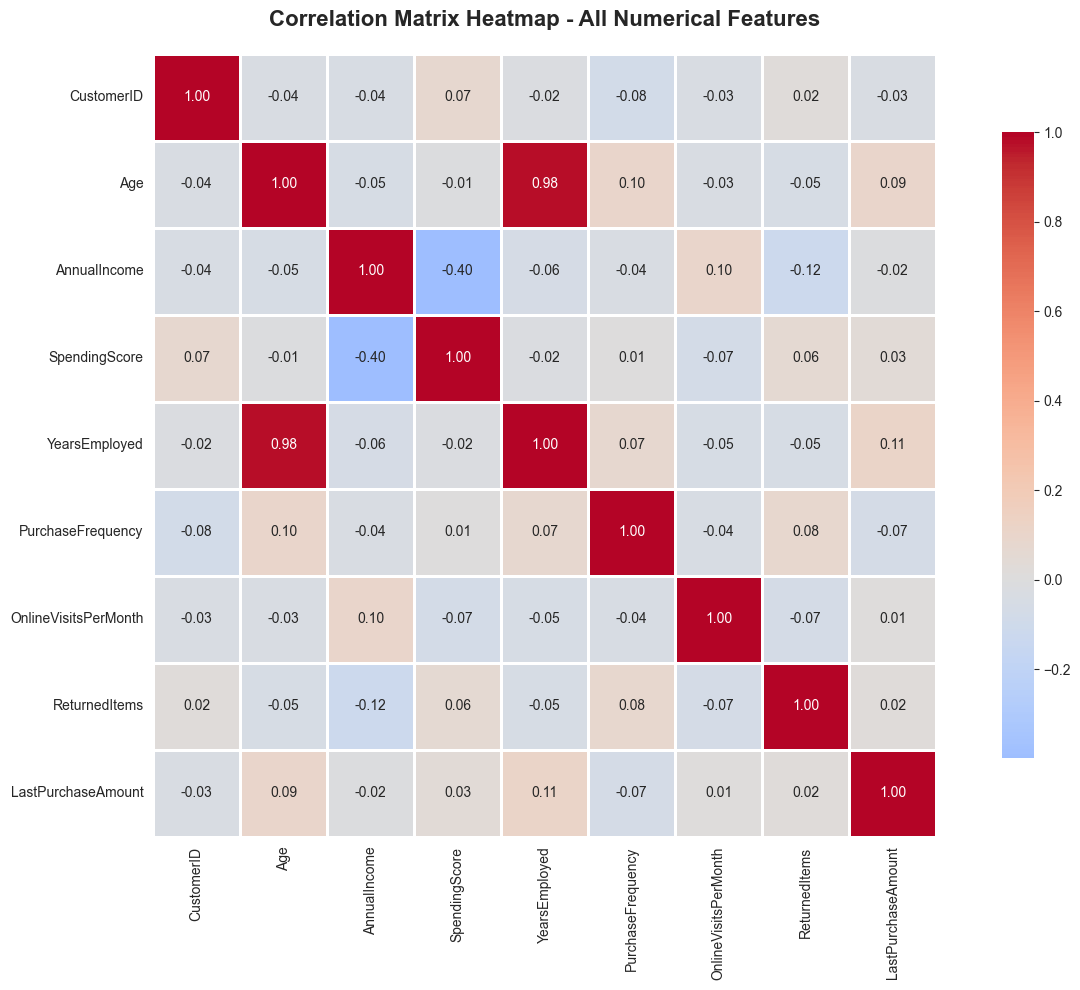

In [14]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap - All Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [15]:
# Identify strongest correlations (excluding diagonal)
print("\nTop 10 Strongest Correlations:")
print("="*50)
# Get correlations in long format
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'Variable 1': correlation_matrix.columns[i],
            'Variable 2': correlation_matrix.columns[j],
            'Correlation': correlation_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs)
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
top_correlations = corr_df.nlargest(10, 'Abs_Correlation')
print(top_correlations[['Variable 1', 'Variable 2', 'Correlation']].to_string(index=False))


Top 10 Strongest Correlations:
       Variable 1           Variable 2  Correlation
              Age        YearsEmployed     0.975242
     AnnualIncome        SpendingScore    -0.399534
     AnnualIncome        ReturnedItems    -0.116929
    YearsEmployed   LastPurchaseAmount     0.114464
              Age    PurchaseFrequency     0.103053
     AnnualIncome OnlineVisitsPerMonth     0.096001
              Age   LastPurchaseAmount     0.092891
PurchaseFrequency        ReturnedItems     0.084121
       CustomerID    PurchaseFrequency    -0.077040
    YearsEmployed    PurchaseFrequency     0.073113
